# Data import

In [1]:
from google.colab import drive
import pandas as pd

#import data from google drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/thesis/angular_github_commits.csv')
data.shape

Mounted at /content/drive


(27847, 11)

In [2]:
data.head()

,ocel:eid,merge,Unnamed: 10,Unnamed: 0,ocel:activity,Unnamed: 11,author_name,commit_message,ocel:timestamp,ocel:type:branches,ocel:type:files
0,6a3abf2366e2c32ce3460155903262fee01736c8,False,NaN,0,initial,NaN,Miško Hevery,Initial commit,2014-09-18 09:12:01-07:00,"['devtools-injector-debugging', 'aikidave-patc...","['.gitignore', 'LICENSE']"
1,afa761646472120edef1f9b01f219f125f20128e,False,NaN,1,build,NaN,Tobias Bosch,build - refactor,2014-09-18 14:56:38-07:00,"['devtools-injector-debugging', 'aikidave-patc...",NaN
2,45f8a5119488d28bf90311b2dd7fc55ee6f7d92a,False,NaN,6,build,NaN,Tobias Bosch,build: prevent infinite loop during install,2014-09-19 14:29:20-07:00,"['devtools-injector-debugging', 'aikidave-patc...",['gulpfile.js']
3,5af57922dbf5b3cf76adb5e3831f9aa21dddc17c,False,NaN,2,chore,NaN,Misko Hevery,chore: add .c9 to gitignore,2014-09-19 21:55:04+00:00,"['devtools-injector-debugging', 'aikidave-patc...",['.gitignore']
4,9f1db3f2bcf67f49c9b145e1d1e8f090220372df,False,NaN,3,chore,NaN,Misko Hevery,chore: correct postinstall.sh script,2014-09-19 21:55:37+00:00,"['devtools-injector-debugging', 'aikidave-patc...","['package.json', 'postinstall.sh']"


In [3]:
!pip install pm4py
import pm4py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=d0814c0e160baa8d058a1d281943844ab7a4b892d99b0e796409df8e3fb20f34
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16967 sha256=7ce90c0a9c32a9cda957a6cf44f12ec15b3cac39f3d4a164296566cf2e9ba36a
  Stored in directory: /root/.cache/pip/wheels/79/25/0a/4a0c2c7af31a8b473f6e10e30312396f31ae899722600d7b99
Successfully built intervaltree stringdist


In [4]:
#import data in jsonocel format
ocel_data = pm4py.objects.ocel.importer.jsonocel.variants.classic.apply(file_path = '/content/drive/MyDrive/thesis/angular_github_commits.jsonocel')
temporal_summary = pm4py.ocel_temporal_summary(ocel_data)
temporal_summary

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


,ocel:timestamp,ocel:activity,ocel:oid
0,2014-09-18 09:12:01-07:00,{initial},"{buildkite-docker-compose, elements-typo-fix, ..."
1,2014-09-18 14:56:38-07:00,{build},"{buildkite-docker-compose, elements-typo-fix, ..."
2,2014-09-19 14:29:20-07:00,{build},"{buildkite-docker-compose, elements-typo-fix, ..."
3,2014-09-19 21:55:04+00:00,{chore},"{buildkite-docker-compose, elements-typo-fix, ..."
4,2014-09-19 21:55:37+00:00,{chore},"{buildkite-docker-compose, elements-typo-fix, ..."
...,...,...,...
27224,2023-09-06 18:23:35+00:00,{release},"{g3, package.json, migrate-saucelabs-to-ga, CH..."
27225,2023-09-07 22:02:21+02:00,{build},"{.bazelrc, g3, main}"
27226,2023-09-08 09:13:15+02:00,{build},{packages/compiler-cli/src/ngtsc/file_system/t...
27227,2023-09-08 11:23:07+00:00,{docs},"{aio/content/guide/what-is-angular.md, g3, main}"


In [5]:
# Gets the list of object types contained in the object-centric event log
get_object_types = pm4py.ocel.ocel_get_object_types(ocel_data)

# Gets the list of attributes at the event and the object level of an object-centric event log
get_attribute_names = pm4py.ocel.ocel_get_attribute_names(ocel_data)

# Gets the set of activities performed for each object type
object_type_activities = pm4py.ocel.ocel_object_type_activities(ocel_data)

# Counts for each event the number of related objects per type
objects_ot_count = pm4py.ocel.ocel_objects_ot_count(ocel_data)

# Gets the objects summary of an object-centric event log
objects_summary = pm4py.ocel.ocel_objects_summary(ocel_data)

In [6]:
#objects_ot_count
objects_summary

,ocel:oid,activities_lifecycle,lifecycle_start,lifecycle_end,lifecycle_duration,interacting_objects
0,.babelrc,[perf],2017-01-27 17:39:48-08:00,2017-01-27 17:39:48-08:00,0.0,{tools/public_api_guard/core/typings/core.d.ts...
1,.bazelignore,"[build, build, build, build, build, ci, build,...",2018-10-15 16:51:26-07:00,2023-08-23 20:40:51+00:00,153175765.0,"{modules/playground/src/http/BUILD.bazel, inte..."
2,.bazelrc,"[build, build, build, build, build, build, bui...",2017-06-02 09:43:52-07:00,2023-09-07 22:02:21+02:00,197695109.0,{projects/ng-devtools-backend/src/lib/highligh...
3,.bazelversion,"[build, build, build, build, build, build, bui...",2020-02-04 16:14:21-08:00,2022-03-21 21:27:51+01:00,67032810.0,{projects/ng-devtools-backend/src/lib/highligh...
4,.bowerrc,"[feat, bug, chore]",2015-02-25 07:45:51-08:00,2015-10-28 15:22:40-07:00,21191809.0,"{buildkite-docker-compose, elements-typo-fix, ..."
...,...,...,...,...,...,...
28312,yarn.lock.readme.md,"[build, docs, build, build]",2017-09-21 15:39:43+02:00,2022-05-03 18:34:54+00:00,145601711.0,"{aio/scripts/check-environment.js, buildkite-d..."
28313,zone/es6-promise.js,[feat],2015-04-10 12:42:33+02:00,2015-04-10 12:42:33+02:00,0.0,"{buildkite-docker-compose, elements-typo-fix, ..."
28314,zone/long-stack-trace-zone.js,[feat],2015-04-10 12:42:33+02:00,2015-04-10 12:42:33+02:00,0.0,"{buildkite-docker-compose, elements-typo-fix, ..."
28315,zone/zone-microtask.js,[refactor],2015-04-30 19:51:22+02:00,2015-04-30 19:51:22+02:00,0.0,"{buildkite-docker-compose, elements-typo-fix, ..."


In [7]:
print("There are:")
print(len(get_object_types), 'object types:' , get_object_types)
print(len(get_attribute_names), ' attributes:' , get_attribute_names)
print(data['ocel:activity'].nunique(), 'different activity names')
print(len(object_type_activities['branches']), 'activities associated with object type "branches" ')
print(len(object_type_activities['files']), 'activities associated with object type "files" ')
print(len(objects_summary), 'objects')
print(len(objects_summary[objects_summary.lifecycle_duration > 0]), 'objects with lifecycle duration > 0')

There are:
2 object types: ['branches', 'files']
6  attributes: ['Unnamed: 0', 'Unnamed: 10', 'Unnamed: 11', 'author_name', 'commit_message', 'merge']
67 different activity names
67 activities associated with object type "branches" 
65 activities associated with object type "files" 
28317 objects
18502 objects with lifecycle duration > 0


(array([19564.,  2499.,  1184.,  1139.,  2185.,   808.,   648.,   222.,
           39.,    29.]),
 array([0.00000000e+00, 2.83130384e+07, 5.66260768e+07, 8.49391152e+07,
        1.13252154e+08, 1.41565192e+08, 1.69878230e+08, 1.98191269e+08,
        2.26504307e+08, 2.54817346e+08, 2.83130384e+08]),
 <BarContainer object of 10 artists>)

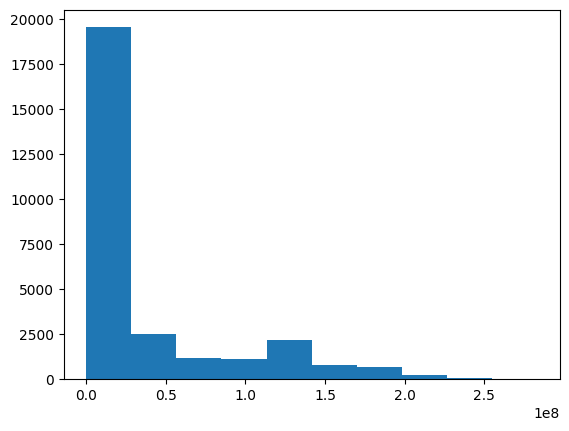

In [8]:
import matplotlib.pyplot as plt

plt.hist(objects_summary.lifecycle_duration)


In [9]:
objects_summary.head()

,ocel:oid,activities_lifecycle,lifecycle_start,lifecycle_end,lifecycle_duration,interacting_objects
0,.babelrc,[perf],2017-01-27 17:39:48-08:00,2017-01-27 17:39:48-08:00,0.0,{tools/public_api_guard/core/typings/core.d.ts...
1,.bazelignore,"[build, build, build, build, build, ci, build,...",2018-10-15 16:51:26-07:00,2023-08-23 20:40:51+00:00,153175765.0,"{modules/playground/src/http/BUILD.bazel, inte..."
2,.bazelrc,"[build, build, build, build, build, build, bui...",2017-06-02 09:43:52-07:00,2023-09-07 22:02:21+02:00,197695109.0,{projects/ng-devtools-backend/src/lib/highligh...
3,.bazelversion,"[build, build, build, build, build, build, bui...",2020-02-04 16:14:21-08:00,2022-03-21 21:27:51+01:00,67032810.0,{projects/ng-devtools-backend/src/lib/highligh...
4,.bowerrc,"[feat, bug, chore]",2015-02-25 07:45:51-08:00,2015-10-28 15:22:40-07:00,21191809.0,"{buildkite-docker-compose, elements-typo-fix, ..."


In [10]:
# Gets the objects interactions summary of an object-centric event log - too large to compute
# objects_interactions_summary = pm4py.ocel.ocel_objects_interactions_summary(ocel_data)



In [11]:
# ocdfg = pm4py.ocel.discover_ocdfg(ocel_data)
# pm4py.view_ocdfg(ocdfg, annotation='frequency', format='png')
# pm4py.save_vis_ocdfg(ocdfg, 'ocdfg.png', annotation='frequency')
# ocpn = pm4py.discover_oc_petri_net(ocel_data)
# pm4py.save_vis_ocpn(ocpn, 'ocpn.png')

In [12]:
# too large to compute
# clusters = pm4py.ocel.cluster_equivalent_ocel(ocel_data, 'branches')

obj_graph = pm4py.ocel.discover_objects_graph(ocel_data, graph_type='object_interaction')
event_log_branches = pm4py.ocel_flattening(ocel_data, 'branches')
event_log_files = pm4py.ocel_flattening(ocel_data, 'files')

In [13]:
event_log_branches.head()

,ocel:eid,time:timestamp,concept:name,commit_message,author_name,Unnamed: 0,merge,Unnamed: 10,Unnamed: 11,case:concept:name,case:ocel:type
0,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,8.2.x,branches
1,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,test-abuse-orb5,branches
2,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,15.0.x,branches
3,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,aikidave-patch-1,branches
4,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,14.2.x,branches


In [14]:
import pandas as pd

# event_log_branches.to_csv('event_log_branches.csv')
# event_log_files.to_csv('event_log_files.csv')

event_log_branches.to_csv('/content/drive/MyDrive/thesis/event_log_branches.csv')
event_log_files.to_csv('/content/drive/MyDrive/thesis/event_log_files.csv')

In [15]:
# example = data[data['ocel:eid'] == '0001dbdede720293a95faa75b6187f53c92c579d']
# branches = example['ocel:type:branches']
# list(branches)[0]

**Dataset info**

Total number of events in the OCEL: 27847

Number of objest types: 2 (branches, files)

Number of activity names: 67

Number of unique contributors: 2049

Number of unique objects: 28316



# Contributors analysis

In [16]:
print('Number of unique contributors:', data.author_name.nunique())
print('Average number of commits per contributor:', len(data)/data.author_name.nunique())

Number of unique contributors: 2049
Average number of commits per contributor: 13.59053196681308


(array([   0., 1384.,  271.,  107.,   52.,   27.,   24.,   13.,   11.,
           8.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

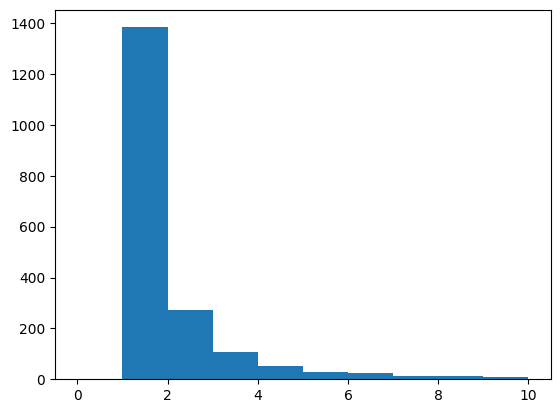

In [17]:
plt.hist(data.groupby(['author_name']).count().commit_message.values, range = (0,10))

In [18]:
data.groupby(['author_name']).count().commit_message.values

array([1, 1, 1, ..., 1, 1, 1])

Building a network:
1. By number of edited files in common
2. By number of branches in common
3. By number of consecutive edits

In [26]:
# Network 1: by number of edited files in common
flat =  pm4py.ocel_flattening(ocel_data, 'files')
flat.head()

,ocel:eid,time:timestamp,concept:name,commit_message,author_name,Unnamed: 0,merge,Unnamed: 10,Unnamed: 11,case:concept:name,case:ocel:type
0,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,.gitignore,files
1,6a3abf2366e2c32ce3460155903262fee01736c8,2014-09-18 09:12:01-07:00,initial,Initial commit,Miško Hevery,0,False,NaN,NaN,LICENSE,files
2,45f8a5119488d28bf90311b2dd7fc55ee6f7d92a,2014-09-19 14:29:20-07:00,build,build: prevent infinite loop during install,Tobias Bosch,6,False,NaN,NaN,gulpfile.js,files
3,5af57922dbf5b3cf76adb5e3831f9aa21dddc17c,2014-09-19 21:55:04+00:00,chore,chore: add .c9 to gitignore,Misko Hevery,2,False,NaN,NaN,.gitignore,files
4,9f1db3f2bcf67f49c9b145e1d1e8f090220372df,2014-09-19 21:55:37+00:00,chore,chore: correct postinstall.sh script,Misko Hevery,3,False,NaN,NaN,package.json,files


In [32]:
# computing a list of contributors for each file (not branch dependant)
file_contributors = flat.groupby(by='case:concept:name').author_name.unique()
file_contributors_num = flat.groupby(by='case:concept:name').author_name.nunique()

(array([0.0000e+00, 1.1996e+04, 5.2150e+03, 2.7590e+03, 1.9950e+03,
        1.4750e+03, 8.9600e+02, 1.3880e+03, 6.7700e+02, 3.8500e+02,
        2.7100e+02, 2.1500e+02, 1.6600e+02, 1.3100e+02, 9.4000e+01,
        8.6000e+01, 6.0000e+01, 4.4000e+01, 4.5000e+01, 4.1000e+01,
        3.0000e+01, 3.9000e+01, 2.1000e+01, 1.0000e+01, 1.0000e+01,
        1.1000e+01, 1.3000e+01, 1.1000e+01, 1.0000e+01, 1.6000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 <BarContainer object of 30 artists>)

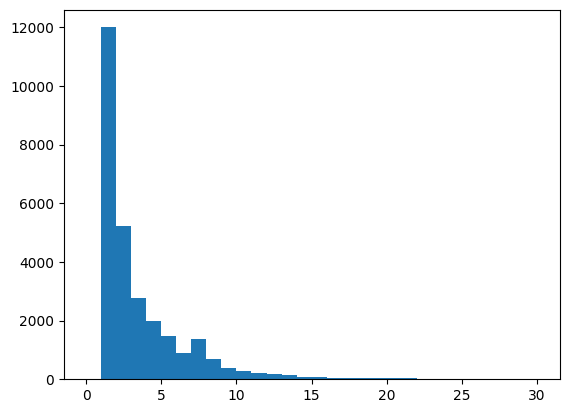

In [41]:
# visualizing a distribution of unique authors num per file
plt.hist(file_contributors_num, range = (0,30), bins = 30)

About half of the files have only 1 author

TO DO: count the same but authors within 1 branch

In [43]:
# Network 2: by number of branches in common
flat_branches =  pm4py.ocel_flattening(ocel_data, 'branches')
branch_contributors = flat_branches.groupby(by='case:concept:name').author_name.unique()
branch_contributors_num = flat_branches.groupby(by='case:concept:name').author_name.nunique()

In [45]:
branch_contributors

case:concept:name
10.0.x                           [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
10.1.x                           [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
10.2.x                           [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
11.0.x                           [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
11.1.x                           [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
                                                       ...                        
test_publishing_secret_branch    [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
ts_library_plugin                [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
watch-burn-rates                 [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
win-test                         [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
windows-executor-no-cache        [Miško Hevery, Tobias Bosch, Misko Hevery, Voj...
Name: author_name, Length: 139, dtype: object

(array([20.,  5.,  6., 12.,  7.,  4., 18., 18., 21., 28.]),
 array([1.000e+00, 2.030e+02, 4.050e+02, 6.070e+02, 8.090e+02, 1.011e+03,
        1.213e+03, 1.415e+03, 1.617e+03, 1.819e+03, 2.021e+03]),
 <BarContainer object of 10 artists>)

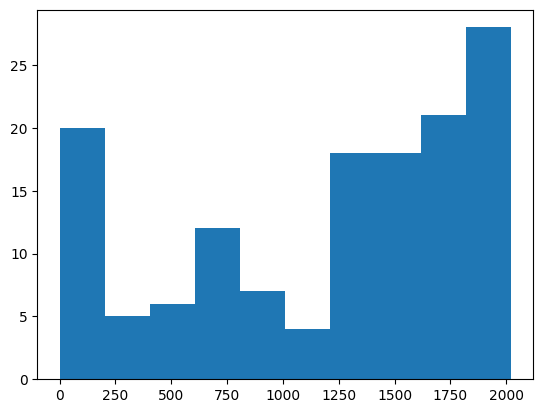

In [46]:
plt.hist(branch_contributors_num)

In [47]:
branch_contributors_num.max()

2021

In [48]:
branch_contributors_num.min()

1

# Files analysis

Stats:
1. Most and least edited file
2. File with most contributors
3. File with longest lifecycle
4. Correlation between contributors number and lifecycle length